# Hoja de Trabajo Regresión Lineal 

Marcos Gutierrez

#### Importamos las librerias

In [1]:
# Modulos para analiss
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn  as sb
# Modulos realizados en clases
from gradient_descent import gradient_descent
from linear_cost import linear_cost
from linear_cost_derivate import linear_cost_derivate

### Abrimos el archivo CSV

In [2]:
#abrimos el csv y lo colocamos en un array
with open('Admission_Predict.csv', "r") as file:
    data = list(csv.reader(file, delimiter = ","))
    #le colocamos con numpy en un array
    data = np.array(data[1:], dtype=np.float)
    

In [3]:
#datos de GRE Score
GRES = data[:,1]

In [4]:
#datos de TFOEL Score
TFOEL = data[:,2]

In [5]:
#datos de Chance of Admit
Chance = data[:,8]

### Visualización de los datos Pandas

In [6]:
#Visualizacion de los datos, se usaran los datos GRE Score, TOEFL Score y Chance of Admit
dataset = pd.read_csv('Admission_Predict.csv', usecols=['GRE Score', 'TOEFL Score', 'Chance of Admit '])

In [7]:
#Describe de todos los datos 
dataset.head()

,GRE Score,TOEFL Score,Chance of Admit
0,337,118,0.92
1,324,107,0.76
2,316,104,0.72
3,322,110,0.80
4,314,103,0.65


#### Descripción de cada uno de los Datos que se encuentran en el archivo

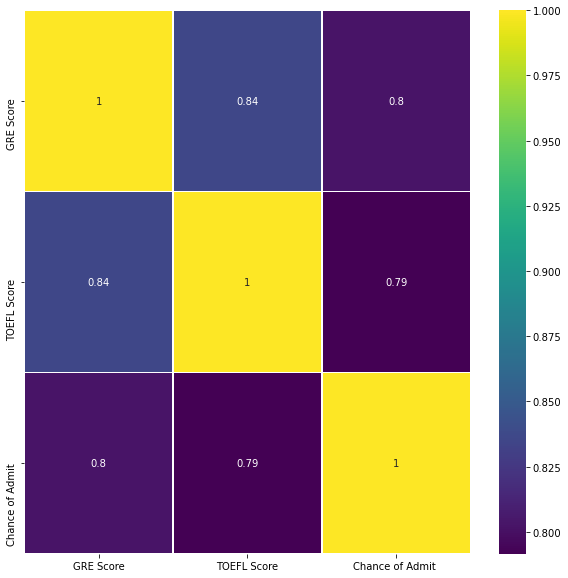

In [8]:
plt.figure(figsize=(10,10))
sb.heatmap(dataset.corr(),cmap='viridis',annot=True,linewidths=0.5,)

La posibilidad de admision esta más dada por las columnas de GRE Score, TOEFl Score y Chance Admit, por lo cual son los datos que se tendran para el analisis.

### TRAINING AND TEST DATA

In [49]:
TRAINING_ELEMENTS = 240
TEST_ELEMENTS = 80
data = dataset.iloc[:len(dataset), 0:3].values
# datos para el trainnig
training = data[:TRAINING_ELEMENTS]
test = data[TEST_ELEMENTS:]

In [50]:
#datos preparados 
trainingPreparate = training[:len(data), 2].reshape(-1,1)
testPreparate = test[:len(data), 2].reshape(-1,1)

In [51]:
#Los datos de X, son la union entre los datoas de GRE Score y TOEFL Score
X = dataset.iloc[:len(data), 0].values
# Colocamos los limites de la matriz
X = X.reshape(-1, 1)
X = np.insert(X, 0, dataset.iloc[:len(data), 0].values, axis = 1)
# Header of array ["GRE Score", "TOEFL"]
X = np.insert(X, 0, 1, axis = 1)

In [52]:
#Los datos de y, son los de Chance of Admit
y = dataset.iloc[:len(dataset), 2].values.reshape(-1,1)

In [53]:
m,n = X.shape
theta_0 = np.random.rand(n,1)
print(theta_0)

[[0.90636573]
 [0.67057376]
 [0.02357054]]


In [54]:
# Implementamos funciones
theta, costs, gradient_norms = gradient_descent(
    X, 
    y, 
    theta_0, 
    linear_cost, 
    linear_cost_derivate,
    lamda = 0,
    alpha = 0.000001,
    treshold = 0.001, 
    max_iter = 100000)

In [55]:
# array de los datos entrenados
train = []
cv = []
#ciclo para recorrerlo
for i in range(0, 100, 10):
    train.append(linear_cost(training, trainingPreparate, theta, i))
    cv.append(linear_cost(test, testPreparate, theta, i))

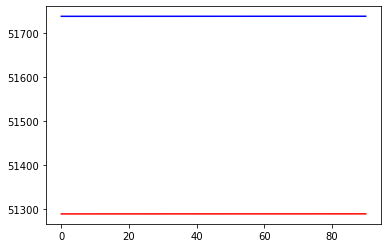

In [56]:
#Graficamos para visualizacion de los datos
plt.plot(np.arange(0, 100, 10), train, color="blue")
plt.plot(np.arange(0, 100, 10), cv, color="red")

## Regularización del Método

Para aplicar la regulacion de los metodos en el dataset generado, se va a realizar en diferentes comparacion entre cada uno de los datos. Además, se utilizara un lambda encontrado durante el training y test anterior realizado al dataset generado

### GRE Score vs TOEFL Score

In [96]:
# Training elements generados por numpy
TRAINING_ELEMENTS = 200

In [97]:
# X corresponden a los datos de la columna GRE Score
x = np.asarray(dataset['GRE Score'][:TRAINING_ELEMENTS])

# Generamos la matriz  con los datos de entrenamiento y los datos de GRE Score
X = np.vstack((np.ones(TRAINING_ELEMENTS), x, (x ** 2)/100)).T

In [98]:
# Columna test, generada por los datos de TOEFL Score 
y = np.asarray(dataset['TOEFL Score'][:TRAINING_ELEMENTS])
dataGenerate = (X, y.reshape(TRAINING_ELEMENTS, 1))

In [99]:
m,n = X.shape
theta_0 = np.random.rand(n,1)
print(theta_0)

[[0.27335082]
 [0.36396226]
 [0.57359815]]


In [100]:
X , y = dataGenerate
# Implementamos funciones
theta, costs, gradient_norms = gradient_descent(
    X, 
    y, 
    theta_0, 
    linear_cost, 
    linear_cost_derivate,
    lamda = 10,
    alpha = 0.000001,
    treshold = 0.001, 
    max_iter = 100000)

#verificacion de los datos
print(theta)

[[0.27043997]
 [0.23259072]
 [0.03369577]]


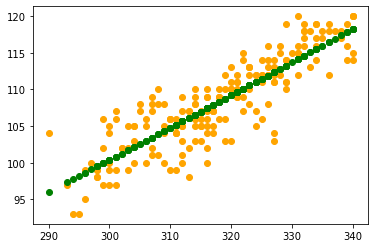

In [101]:
plt.scatter(X[:, 1], y, color="orange")
# Se junta las variables X y theta por medio de una multplicacion
plt.scatter(X[:, 1], np.matmul(X, theta), color='green')
plt.show()

En conclusion, se puede observar que el metodo de regularización es algo efectivo, por lo cual , la obtención del lambda optimizo encontrar la theta, por lo cual la grafica toma el costo menor, para la aceptación de los alumnos. Y la varibale la TOEFL Score y GRE son las más optimas. 